Samgeo

In [1]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps
import pandas as pd

In [2]:
name = os.listdir()[11]
print(name)

Finland


In [3]:
name_list = os.listdir(name)

In [23]:
label = 5
print(name_list[label])

KymiRing


In [24]:

m = leafmap.Map(center=[
60.882642, 26.478650


], zoom=16)
m.add_basemap("Satellite")

m

Map(center=[60.882642, 26.47865], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [25]:
m.user_roi_bounds()

[26.4672, 60.8763, 26.4895, 60.8848]

In [14]:
map = {}




In [26]:
image = name+os.sep+name_list[label]+f"\\{name_list[label]}.tif"
map[image] = m.user_roi_bounds()

In [27]:
map

{'Finland\\Hameenlinna\\Hameenlinna.tif': [24.4081, 60.9998, 24.4216, 61.0047],
 'Finland\\Kemora\\Kemora.tif': [23.9795, 63.4124, 23.993, 63.4209],
 'Finland\\KymiRing\\KymiRing.tif': [26.4672, 60.8763, 26.4895, 60.8848]}

In [28]:
for i, j in map.items():
    tms_to_geotiff(output=i, bbox=j, zoom=19, source="Satellite", overwrite=True)

Downloaded image 001/315
Downloaded image 002/315
Downloaded image 003/315
Downloaded image 004/315
Downloaded image 005/315
Downloaded image 006/315
Downloaded image 007/315
Downloaded image 008/315
Downloaded image 009/315
Downloaded image 010/315
Downloaded image 011/315
Downloaded image 012/315
Downloaded image 013/315
Downloaded image 014/315
Downloaded image 015/315
Downloaded image 016/315
Downloaded image 017/315
Downloaded image 018/315
Downloaded image 019/315
Downloaded image 020/315
Downloaded image 021/315
Downloaded image 022/315
Downloaded image 023/315
Downloaded image 024/315
Downloaded image 025/315
Downloaded image 026/315
Downloaded image 027/315
Downloaded image 028/315
Downloaded image 029/315
Downloaded image 030/315
Downloaded image 031/315
Downloaded image 032/315
Downloaded image 033/315
Downloaded image 034/315
Downloaded image 035/315
Downloaded image 036/315
Downloaded image 037/315
Downloaded image 038/315
Downloaded image 039/315
Downloaded image 040/315


In [11]:
bbox=m.user_roi_bounds()
tms_to_geotiff(output=image, bbox=m.user_roi_bounds(), zoom=20, source="Satellite", overwrite=True)

Downloaded image 0001/2436
Downloaded image 0002/2436
Downloaded image 0003/2436
Downloaded image 0004/2436
Downloaded image 0005/2436
Downloaded image 0006/2436
Downloaded image 0007/2436
Downloaded image 0008/2436
Downloaded image 0009/2436
Downloaded image 0010/2436
Downloaded image 0011/2436
Downloaded image 0012/2436
Downloaded image 0013/2436
Downloaded image 0014/2436
Downloaded image 0015/2436
Downloaded image 0016/2436
Downloaded image 0017/2436
Downloaded image 0018/2436
Downloaded image 0019/2436
Downloaded image 0020/2436
Downloaded image 0021/2436
Downloaded image 0022/2436
Downloaded image 0023/2436
Downloaded image 0024/2436
Downloaded image 0025/2436
Downloaded image 0026/2436
Downloaded image 0027/2436
Downloaded image 0028/2436
Downloaded image 0029/2436
Downloaded image 0030/2436
Downloaded image 0031/2436
Downloaded image 0032/2436
Downloaded image 0033/2436
Downloaded image 0034/2436
Downloaded image 0035/2436
Downloaded image 0036/2436
Downloaded image 0037/2436
D

Un-supervised Classification

In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import cv2


In [2]:
root = r'Selected tracks 2\Heartland Park\\'

In [3]:
import subprocess

# Define your file paths
src = root + "Heartland Park.tif"
imagePath = root + "output_resampled.tif"

# Run the gdalwarp command using subprocess
subprocess.run(["gdalwarp", "-r", "bilinear", "-tr", "0.5", "0.5", src, imagePath], check=True)


CompletedProcess(args=['gdalwarp', '-r', 'bilinear', '-tr', '0.5', '0.5', 'Selected tracks 2\\Heartland Park\\\\Heartland Park.tif', 'Selected tracks 2\\Heartland Park\\\\output_resampled.tif'], returncode=0)

In [4]:
with rasterio.open(imagePath) as b:
    bands = b.read()
image_array = np.transpose(bands, (1, 2, 0))

In [5]:
image_array = cv2.GaussianBlur(image_array, (5, 5), 0) 

In [6]:
image_array.shape

(3806, 2249, 3)

In [7]:
# Reshape the image to (pixels, bands) for clustering
pixels = image_array.reshape(-1, image_array.shape[2])


In [8]:
kmeans = KMeans(n_clusters=6, random_state=42)
# kmeans = DBSCAN()
kmeans.fit(pixels)

KMeans(n_clusters=6, random_state=42)

In [9]:
labels = kmeans.labels_

In [10]:
# Reshape the labels back to the original image shape (height, width)
classified_image = labels.reshape(image_array.shape[0], image_array.shape[1])


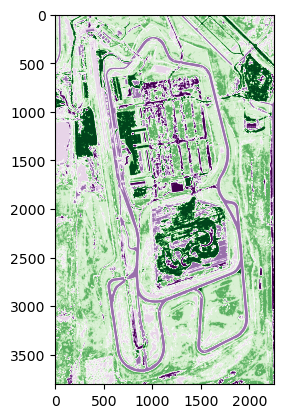

In [11]:
plt.imshow(classified_image, cmap='PRGn')

In [12]:
np.unique(classified_image)

array([0, 1, 2, 3, 4, 5])

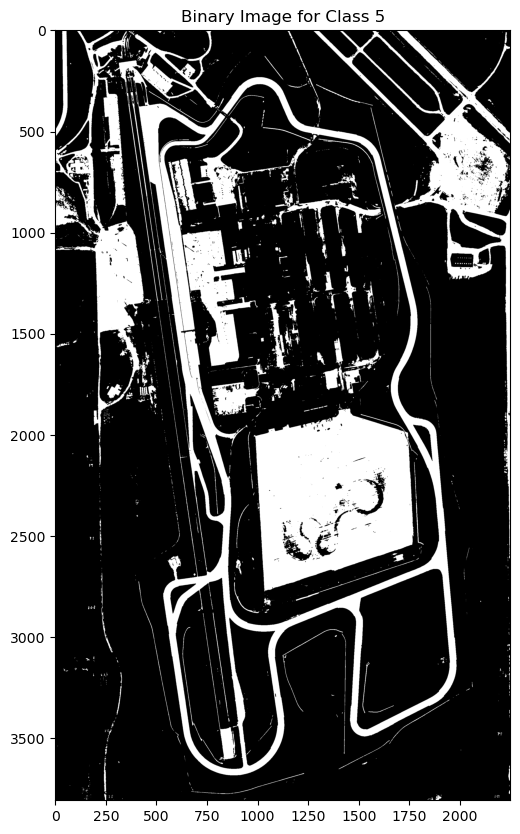

In [20]:
# Select a specific lael (e.g., class 2)
selected_label = 5


# Create a binary image: 1 for the selected class, 0 for others
binary_image = ((classified_image == 1)|(classified_image == selected_label)  ).astype(int)

plt.figure(figsize=(10,10))
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image for Class {selected_label}')
plt.show()

In [21]:
bin_img = root + 'binary_output.tif'
with rasterio.open(
    bin_img,
    'w',
    driver='GTiff',
    height=binary_image.shape[0],
    width=binary_image.shape[1],
    count=1,  # Single band for the binary image
    dtype=binary_image.dtype,
    crs=b.crs,
    transform=b.transform
) as dst:
    dst.write(binary_image, 1)

print("Binary image saved as 'binary_output.tif'")


Binary image saved as 'binary_output.tif'
